In [1]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn import datasets
from sklearn import model_selection
import numpy as np
import matplotlib as mp
import jupyter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mem = Memory("./mycache")

@mem.cache
def get_data(mysvmlightfile):
    data = load_svmlight_file(mysvmlightfile)
    return data[0], data[1]

In [3]:
#读取数据集
x_data,y_data=get_data('housing_scale.txt')

________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-Administrator-Desktop-机器学习实验课-ML2017-lab-01-master-ML2017-lab-01-master-__ipython-input__.get_data...
get_data('housing_scale.txt')
_________________________________________________________get_data - 0.0s, 0.0min


In [4]:
#扩展x矩阵一列全为1 使线性模型满足yi=w.T*xi
x_data=x_data.todense()
one=np.ones(x_data.shape[0])
x_data=np.column_stack((x_data,one))

In [5]:
#划分训练集和测试集，20%的数据作为测试集
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_data,y_data,train_size=0.8,test_size=0.2,random_state=0)

In [6]:
#调整数据维度
y_data=np.mat(y_data).T
y_train=np.mat(y_train).T
y_test=np.mat(y_test).T

In [7]:
#参数全零初始化
w=np.zeros(x_train.shape[1])
w=np.mat(w)
w=w.T

#学习速率
rate=0.00029

In [8]:
#输出数据维度
print(x_data.shape,y_data.shape,w.shape,)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(506, 14) (506, 1) (14, 1)
(404, 14) (404, 1)
(102, 14) (102, 1)


In [9]:
#循环次数
epoch=0

In [10]:
#存储循环次数，L_train,L_validation数组来画图
epoch_array=[]
L_train_array=[]
L_validation_array=[]

线性模型为 yi=w.T*xi 则损失函数为 LOSS=1/2*(Y-X*W).T*(Y-X*W),对w求梯度可得，梯度grad=X.T*(X*W-Y)

In [11]:
#梯度下降，循环400次
while epoch<400:
    epoch=epoch+1
    
    #由梯度更新w，w=w-rate*grad
    w = w-rate * (x_train.T * (x_train * w - y_train))
    
    #计算L_train，L_validation
    L_train=((y_train-x_train*w).T*(y_train-x_train*w))/2
    L_validation=((y_test-x_test*w).T*(y_test-x_test*w))/2
    L_train = L_train/x_train.shape[0]
    L_validation =L_validation/x_test.shape[0]
    
    #输出当前的循环次数，L_train,L_validation
    print("epoch:",epoch)
    print("train_loss:",L_train)
    print("validation loss:",L_validation)
    
    #将数据存到数组中
    epoch_array.append(epoch)
    L_train_array.append(np.array(L_train)[0][0])
    L_validation_array.append(np.array(L_validation)[0][0])

iterator time: 1
train_loss: [[ 85.91927533]]
validation loss: [[ 85.69926453]]
iterator time: 2
train_loss: [[ 44.64403311]]
validation loss: [[ 47.88581798]]
iterator time: 3
train_loss: [[ 35.48891143]]
validation loss: [[ 40.52433017]]
iterator time: 4
train_loss: [[ 32.56237328]]
validation loss: [[ 38.82525274]]
iterator time: 5
train_loss: [[ 30.97964391]]
validation loss: [[ 38.17555306]]
iterator time: 6
train_loss: [[ 29.78054697]]
validation loss: [[ 37.70921043]]
iterator time: 7
train_loss: [[ 28.75112275]]
validation loss: [[ 37.26090071]]
iterator time: 8
train_loss: [[ 27.82774515]]
validation loss: [[ 36.79945644]]
iterator time: 9
train_loss: [[ 26.98247638]]
validation loss: [[ 36.32111084]]
iterator time: 10
train_loss: [[ 26.199117]]
validation loss: [[ 35.82843182]]
iterator time: 11
train_loss: [[ 25.46701055]]
validation loss: [[ 35.32558782]]
iterator time: 12
train_loss: [[ 24.77874897]]
validation loss: [[ 34.81697886]]
iterator time: 13
train_loss: [[ 24.128

train_loss: [[ 9.73946356]]
validation loss: [[ 17.09571785]]
iterator time: 388
train_loss: [[ 9.73900724]]
validation loss: [[ 17.09416765]]
iterator time: 389
train_loss: [[ 9.7385544]]
validation loss: [[ 17.09262555]]
iterator time: 390
train_loss: [[ 9.73810501]]
validation loss: [[ 17.0910915]]
iterator time: 391
train_loss: [[ 9.73765903]]
validation loss: [[ 17.08956545]]
iterator time: 392
train_loss: [[ 9.73721644]]
validation loss: [[ 17.08804733]]
iterator time: 393
train_loss: [[ 9.7367772]]
validation loss: [[ 17.08653711]]
iterator time: 394
train_loss: [[ 9.73634128]]
validation loss: [[ 17.08503471]]
iterator time: 395
train_loss: [[ 9.73590866]]
validation loss: [[ 17.08354009]]
iterator time: 396
train_loss: [[ 9.7354793]]
validation loss: [[ 17.08205321]]
iterator time: 397
train_loss: [[ 9.73505318]]
validation loss: [[ 17.08057399]]
iterator time: 398
train_loss: [[ 9.73463026]]
validation loss: [[ 17.0791024]]
iterator time: 399
train_loss: [[ 9.73421053]]
valid

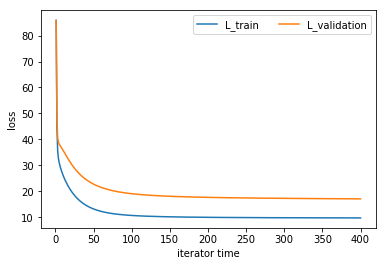

In [12]:
#画图
plt.xlabel('epoch')
plt.ylabel('loss')
line1=plt.plot(epoch_array,L_train_array)
line2=plt.plot(epoch_array,L_validation_array)
label = ["L_train", "L_validation"]
plt.legend(label, loc = 0, ncol = 2)
plt.show()